In [2]:
import music21
import numpy

sieve = music21.sieve.Sieve('3@2|7@1')
pitch_nums = sieve.segment()
punit = 0.50
runit = 0.25
starting_pitch = 60
pitch_nums = numpy.arråay(pitch_nums)
pitch_nums = starting_pitch + pitch_nums * punit
pitch_nums = list(pitch_nums)
print("Pitch:",pitch_nums)

durations = sieve.segment(segmentFormat = 'width')
durations = list(numpy.array(durations) * runit) + [2.0]
print("Durations:",durations)
durations = [music21.duration.Duration(d) for d in durations]

notes = []
for i,p in enumerate(pitch_nums):
    n = music21.note.Note(p)
    n.duration = durations[i]
    notes.append(n)

stream1 = music21.stream.Stream()
stream1.append(notes)
#stream1.show()
sp = music21.midi.realtime.StreamPlayer(stream1)
sp.play()

Pitch: [30.5, 31.0, 32.5, 34.0, 34.5, 35.5, 36.5, 37.0, 37.5, 38.5, 39.0, 40.0, 40.5, 41.0, 41.5, 42.5, 43.0, 44.5, 45.5, 46.0, 46.5, 47.5, 48.0, 48.5, 49.0, 50.5, 51.5, 52.0, 52.5, 53.5, 54.5, 55.0, 56.5, 58.0, 58.5, 59.5, 60.5, 61.0, 62.0, 62.5, 64.0, 64.5, 65.0, 65.5, 66.5, 67.0, 68.5, 69.0, 70.0, 70.5, 71.5, 72.5, 73.0, 74.5, 76.0, 76.5, 77.5, 78.0, 78.5, 79.0, 79.5]
Durations: [0.25, 0.75, 0.75, 0.25, 0.5, 0.5, 0.25, 0.25, 0.5, 0.25, 0.5, 0.25, 0.25, 0.25, 0.5, 0.25, 0.75, 0.5, 0.25, 0.25, 0.5, 0.25, 0.25, 0.25, 0.75, 0.5, 0.25, 0.25, 0.5, 0.5, 0.25, 0.75, 0.75, 0.25, 0.5, 0.5, 0.25, 0.5, 0.25, 0.75, 0.25, 0.25, 0.25, 0.5, 0.25, 0.75, 0.25, 0.5, 0.25, 0.5, 0.5, 0.25, 0.75, 0.75, 0.25, 0.5, 0.25, 0.25, 0.25, 0.25, 2.0]


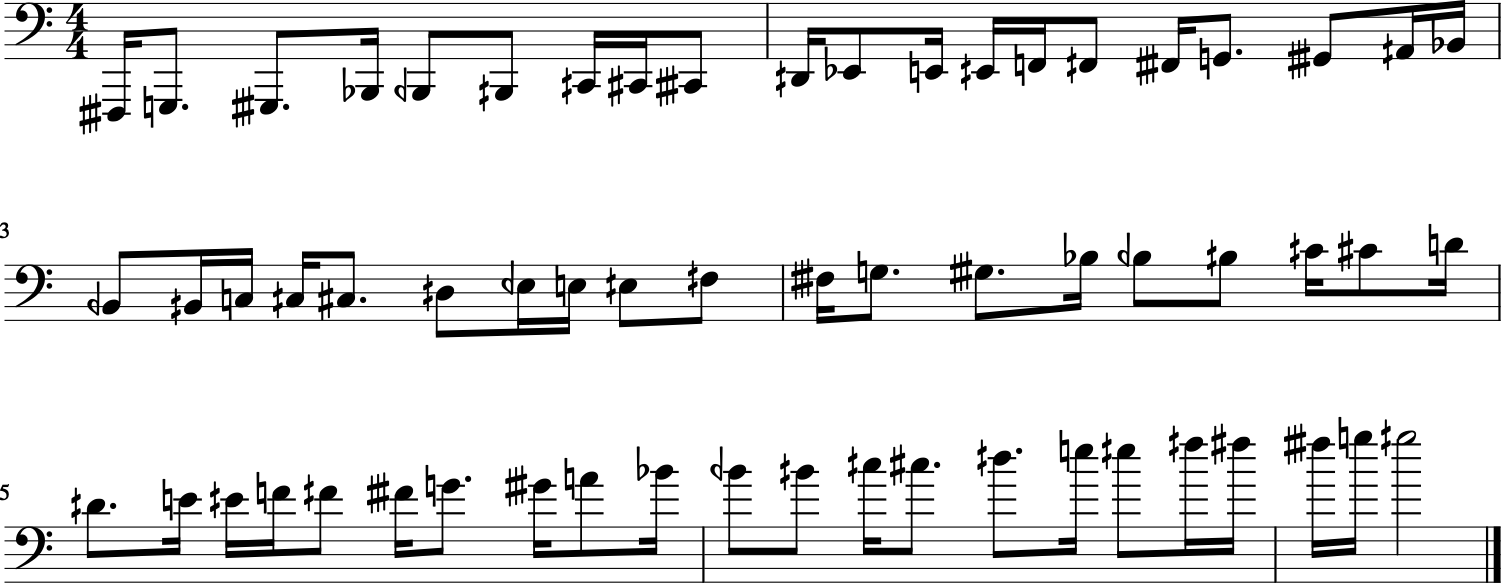

In [40]:
sieve = music21.sieve.Sieve('3@2|7@1|4@1|13@5')
pitch_nums = sieve.segment()
punit = 0.50
runit = 0.25
starting_pitch = 30
pitch_nums = numpy.array(pitch_nums)
pitch_nums = starting_pitch + pitch_nums * punit
pitch_nums = list(pitch_nums)
print("Pitch:",pitch_nums)

durations = sieve.segment(segmentFormat = 'width')
durations = list(numpy.array(durations) * runit) + [2.0]
print("Durations:",durations)
durations = [music21.duration.Duration(d) for d in durations]

notes = []
for i,p in enumerate(pitch_nums):
    n = music21.note.Note(p)
    n.duration = durations[i]
    notes.append(n)

stream1 = music21.stream.Stream()
stream1.append(notes)
stream1.show()
sp = music21.midi.realtime.StreamPlayer(stream1)
sp.play()


